In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Desafío Final: 
## Fichero datos_usuarios_restaurante.csv
Víctor González 100363949 - Ángel Luis Alonso 100363923 - Marcos Arroyo 100363919

## Primer paso

### Preparado de datos, carga de datos y organización-limpieza
Después de haber modificado el archivo **datos_usuario.csv** proporcionado (según explicamos en el documento **preparado_de_datos.pdf**), nos disponemos a analizar el mismo:

In [0]:
#Realizamos todos los imports en esta sección y definiciones

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time as t
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime, date, time, timedelta



Leemos el conjunto de datos tratados:

In [79]:
users = pd.read_csv('datos_usuarios_restaurante.csv', delimiter = ',')
users.head(10)

,Unnamed: 0,Unnamed: 0.1,usuario_id,nombre,num_opiniones,usuario_desde,util,gracioso,guay,experto,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos
0,3,3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,NaN,5,4.85,1,0,0,0,0,0,2,0,0,1,0
1,9,9,NQffx45eJaeqhFcMadKUQA,Trace,124,2008-12-10 22:59:45,202,70,185,NaN,15,4.53,13,3,0,2,0,12,8,14,14,3,5
2,17,17,CXi7I5J-ItLGJNyKPkI5gA,Cyndi,57,2011-06-27 05:24:10,72,22,34,NaN,4,4.10,2,1,0,0,0,2,1,1,1,2,1
3,19,19,hQ98T_hy1CoSWw55zA49VQ,Jamey,44,2015-11-02 23:41:13,16,3,2,NaN,0,3.10,0,0,0,0,0,0,0,0,0,0,0
4,24,24,J9HamWsxKorlPGUAXy-M9Q,Ronald,336,2010-05-17 22:59:40,431,189,228,"2012,2013,2014,2015,2016,2017",19,3.81,11,2,3,0,0,12,15,19,19,8,4
5,32,32,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018",77,4.02,106,3,4,1,1,60,64,140,140,120,65
6,35,35,eSlOI3GhroEtcbaD_nFXJQ,Jason,2518,2011-05-28 21:42:38,16349,8340,13924,"2012,2013,2014,2015,2016,2017,2018",251,3.61,711,84,59,18,16,361,2861,2267,2267,274,218
7,36,36,27wlLX7e52vVEvNA4Ksccw,Sara,207,2012-12-10 04:55:46,289,72,133,"2013,2014,2015,2016,2017,2018",33,3.82,13,6,2,2,0,27,29,16,16,11,11
8,37,37,QiDtS54JwTGeH81c-a84WQ,Maria,100,2010-01-26 15:36:03,363,90,203,"2011,2012,2013",21,4.39,33,6,2,6,0,36,61,75,75,19,18
9,42,42,NmC_ZemjAQ6TvzgeaAuTmA,Lindsay,87,2008-04-12 14:29:44,240,78,101,"2010,2011,2012,2013,2014",4,3.24,20,6,2,0,0,17,9,22,22,12,1


Eliminamos las columnas que no nos aportan información por ser únicos (*Unnamed: 0*, *Unnamed: 0.1* y *usuario_id*) y observamos que el campo *experto* tiene una gran cantidad de valores nulos. En vez de eliminar todas las instancias con un valor nulo en este campo, sustituimos los 'NaN' por '0' (ya que nos interesa usar todo tipo de usuario, no sólo 'expertos').

Además, modificamos la columna *usuario_desde* para mostrar los días de antigüedad que tiene la cuenta en vez de la fecha. También modificamos la columna *experto* para cambiar los años en los que el usuario ha sido galardonado con este premio por el número de veces en los que ha sido galardonado.

In [80]:
users = users.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
print (users.isnull().sum())

usuario_id              0
nombre                  0
num_opiniones           0
usuario_desde           0
util                    0
gracioso                0
guay                    0
experto             66170
seguidores              0
media_puntuacion        0
like_moda               0
like_extras             0
like_perfil             0
like_formato            0
like_lista              0
like_comentario         0
like_simple             0
like_guay               0
like_divertido          0
like_textos             0
like_fotos              0
dtype: int64


In [81]:
users["experto"].fillna(0, inplace = True)
users.head(10)

,usuario_id,nombre,num_opiniones,usuario_desde,util,gracioso,guay,experto,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos
0,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,0,5,4.85,1,0,0,0,0,0,2,0,0,1,0
1,NQffx45eJaeqhFcMadKUQA,Trace,124,2008-12-10 22:59:45,202,70,185,0,15,4.53,13,3,0,2,0,12,8,14,14,3,5
2,CXi7I5J-ItLGJNyKPkI5gA,Cyndi,57,2011-06-27 05:24:10,72,22,34,0,4,4.10,2,1,0,0,0,2,1,1,1,2,1
3,hQ98T_hy1CoSWw55zA49VQ,Jamey,44,2015-11-02 23:41:13,16,3,2,0,0,3.10,0,0,0,0,0,0,0,0,0,0,0
4,J9HamWsxKorlPGUAXy-M9Q,Ronald,336,2010-05-17 22:59:40,431,189,228,"2012,2013,2014,2015,2016,2017",19,3.81,11,2,3,0,0,12,15,19,19,8,4
5,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018",77,4.02,106,3,4,1,1,60,64,140,140,120,65
6,eSlOI3GhroEtcbaD_nFXJQ,Jason,2518,2011-05-28 21:42:38,16349,8340,13924,"2012,2013,2014,2015,2016,2017,2018",251,3.61,711,84,59,18,16,361,2861,2267,2267,274,218
7,27wlLX7e52vVEvNA4Ksccw,Sara,207,2012-12-10 04:55:46,289,72,133,"2013,2014,2015,2016,2017,2018",33,3.82,13,6,2,2,0,27,29,16,16,11,11
8,QiDtS54JwTGeH81c-a84WQ,Maria,100,2010-01-26 15:36:03,363,90,203,"2011,2012,2013",21,4.39,33,6,2,6,0,36,61,75,75,19,18
9,NmC_ZemjAQ6TvzgeaAuTmA,Lindsay,87,2008-04-12 14:29:44,240,78,101,"2010,2011,2012,2013,2014",4,3.24,20,6,2,0,0,17,9,22,22,12,1


In [82]:
print (users.isnull().sum())

usuario_id          0
nombre              0
num_opiniones       0
usuario_desde       0
util                0
gracioso            0
guay                0
experto             0
seguidores          0
media_puntuacion    0
like_moda           0
like_extras         0
like_perfil         0
like_formato        0
like_lista          0
like_comentario     0
like_simple         0
like_guay           0
like_divertido      0
like_textos         0
like_fotos          0
dtype: int64


In [83]:

formato = "%Y-%m-%d %H:%M:%S"
lengthUsers = users["usuario_desde"].count()
users.usuario_desde = users.usuario_desde.apply(lambda x: (datetime.now() - datetime.strptime(x, formato)).days)
    
print(users["usuario_desde"].head(5))

0    2035
1    4023
2    3095
3    1505
4    3500
Name: usuario_desde, dtype: int64


In [84]:
users.experto = users.experto.apply(lambda x: len(str(x).split(',')) if x!=0  else x)
        
print(users["experto"].head(5))

0    0
1    0
2    0
3    0
4    6
Name: experto, dtype: int64


In [85]:
print(users.head(5))

               usuario_id  nombre  ...  like_textos  like_fotos
0  dD0gZpBctWGdWo9WlGuhlA  Angela  ...            1           0
1  NQffx45eJaeqhFcMadKUQA   Trace  ...            3           5
2  CXi7I5J-ItLGJNyKPkI5gA   Cyndi  ...            2           1
3  hQ98T_hy1CoSWw55zA49VQ   Jamey  ...            0           0
4  J9HamWsxKorlPGUAXy-M9Q  Ronald  ...            8           4

[5 rows x 21 columns]


In [86]:
print (users.dtypes)
users.to_csv('datos_usuarios_restaurante_limpio.csv')
users.drop("usuario_id",1)

usuario_id           object
nombre               object
num_opiniones         int64
usuario_desde         int64
util                  int64
gracioso              int64
guay                  int64
experto               int64
seguidores            int64
media_puntuacion    float64
like_moda             int64
like_extras           int64
like_perfil           int64
like_formato          int64
like_lista            int64
like_comentario       int64
like_simple           int64
like_guay             int64
like_divertido        int64
like_textos           int64
like_fotos            int64
dtype: object


,nombre,num_opiniones,usuario_desde,util,gracioso,guay,experto,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos
0,Angela,17,2035,30,4,14,0,5,4.85,1,0,0,0,0,0,2,0,0,1,0
1,Trace,124,4023,202,70,185,0,15,4.53,13,3,0,2,0,12,8,14,14,3,5
2,Cyndi,57,3095,72,22,34,0,4,4.10,2,1,0,0,0,2,1,1,1,2,1
3,Jamey,44,1505,16,3,2,0,0,3.10,0,0,0,0,0,0,0,0,0,0,0
4,Ronald,336,3500,431,189,228,6,19,3.81,11,2,3,0,0,12,15,19,19,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80056,Amy,5,2916,1,0,0,0,0,4.83,0,0,0,0,0,0,0,0,0,0,0
80057,Kayleigh,2,1207,0,0,0,0,0,2.33,0,0,0,0,0,0,0,0,0,0,0
80058,Diana,8,1246,7,2,0,0,0,2.50,0,0,0,0,0,0,0,0,0,0,0
80059,Curtis,10,2338,2,0,1,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0


## Segundo paso

### Análisis
Análisis de los datos preparados.

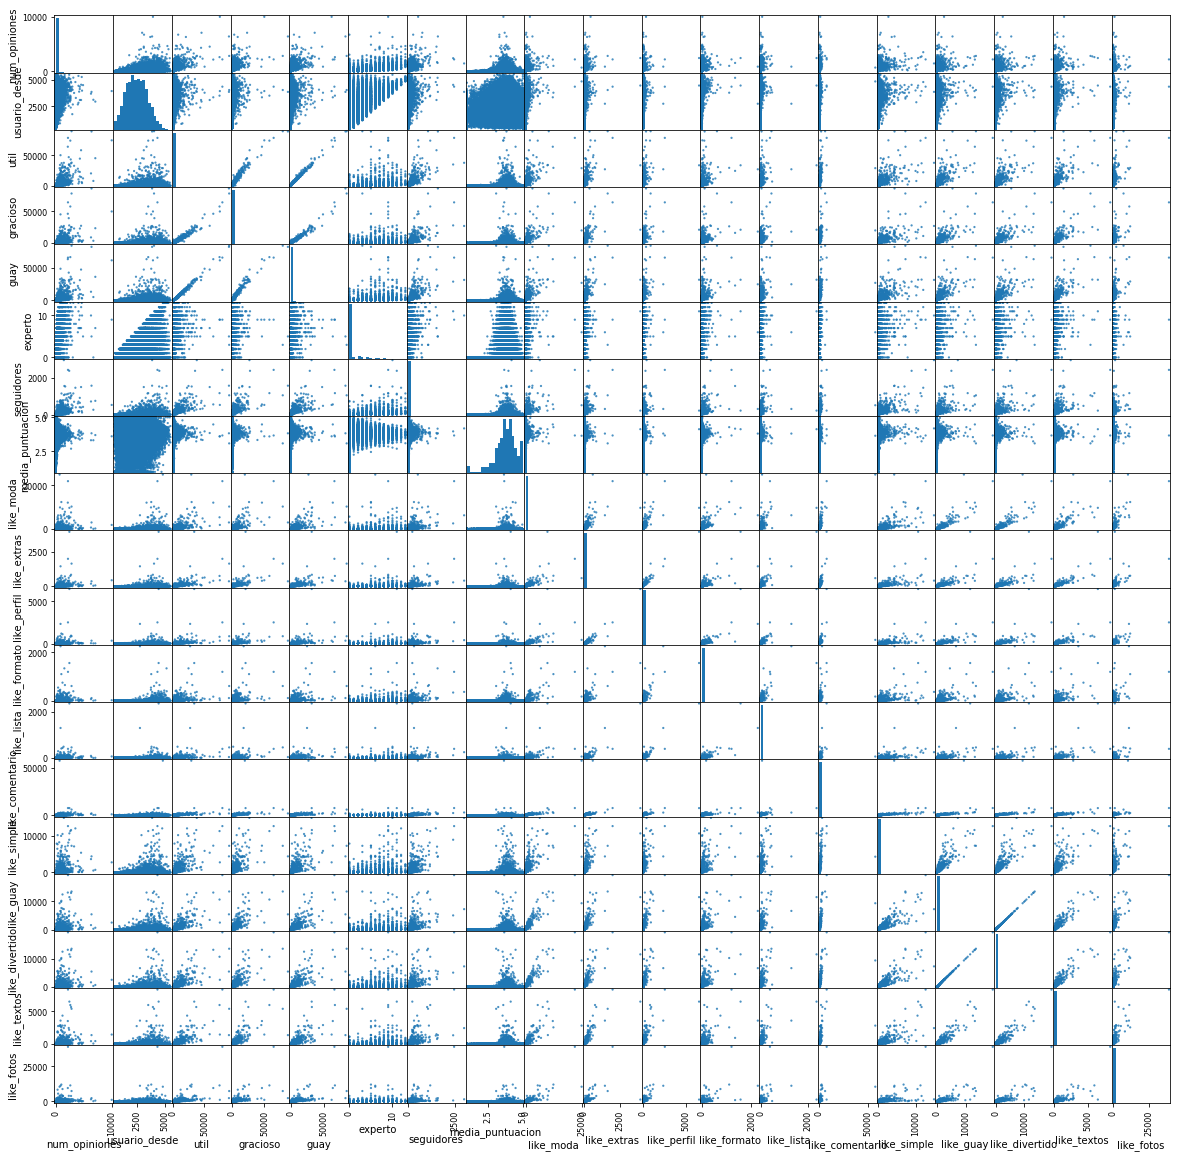

In [87]:
pd.plotting.scatter_matrix(users, figsize=(20, 20), marker='o',hist_kwds={'bins': 20}, s=5, alpha=.8)
plt.show()

En este scatter plot podemos vemos algunas cosas interesantes:
La linealidad de los atributos **like_moda, like_extras, like_simple, like_guay, like_divertido, like_textos y like_fotos** entre sí (que luego veremos mejor en la *matriz de correlación*).  
Otro dato interesante es la **media de puntuación**. La dispersión de esta variable frente a las demás una a una sigue una distribución normal asimétrica sesgada a la izquierda. Esta concentración de puntos corresponde al rango de valores de una opinión más habituales (entre 3'5 y 4'5 normalmente). Aunque en el gráfico de dispersión **media de puntuación-usuario desde** apreciamos una nube algo menos uniforme:

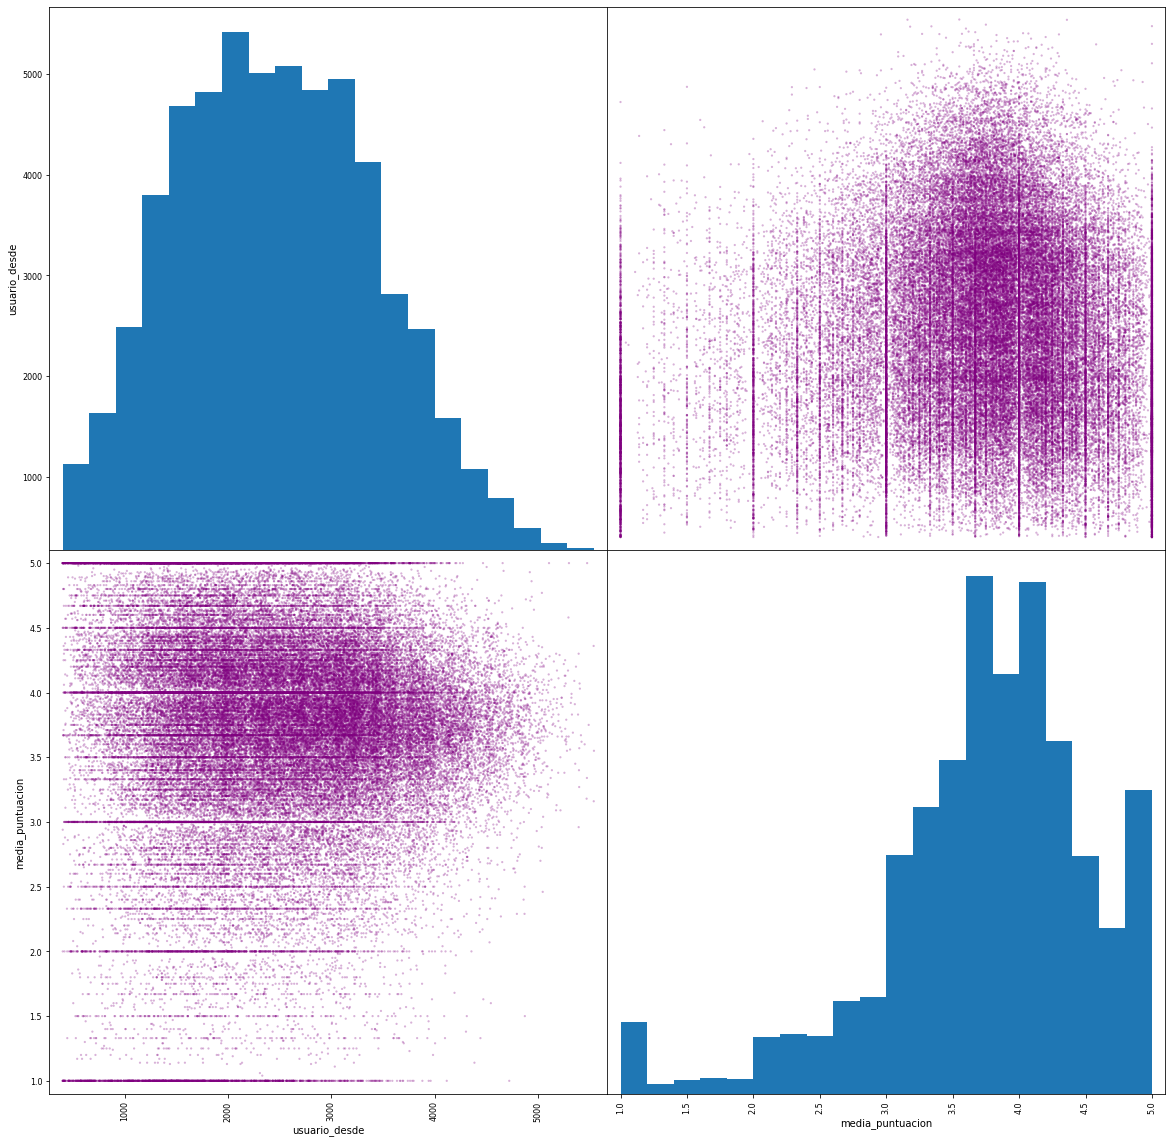

In [88]:
medPun_usrDesde = users[['usuario_desde', 'media_puntuacion']]
pd.plotting.scatter_matrix(medPun_usrDesde, figsize=(20, 20), marker='o',hist_kwds={'bins': 20}, s=5, alpha=.3, color='purple')
plt.show()

Podemos apreciar, además de la dispersión de los puntos y su concentración máxima en el rango de puntuación 3'5 y 4'5, que las personas tienden a obtener puntuaciones con los valores *1, 2, 3, 4 y 5*. Podemos apreciar un patrón en forma de arado. Esto podría deberse a los usuarios con pocas opiniones. Al tener pocos comentarios, su nota media puede ser menos dispersa y podría ser la cuasa de este patrón. Por ejemplo, un comentario con un 4 y otro con un 5 da una media de 4.5; o dos comentarios con 5.

**--> PREMISA 1:** Los usuarios que crean una cuenta y realizan pocas revisiones suelen tener una nota 'redonda' (1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5). Esto sería la causa por la que la nube tiene un patrón en forma de 'arado'.

Si eliminamos el ruido imponiendo la condición de que los usuarios deban que tener al menos 15 revisiones:

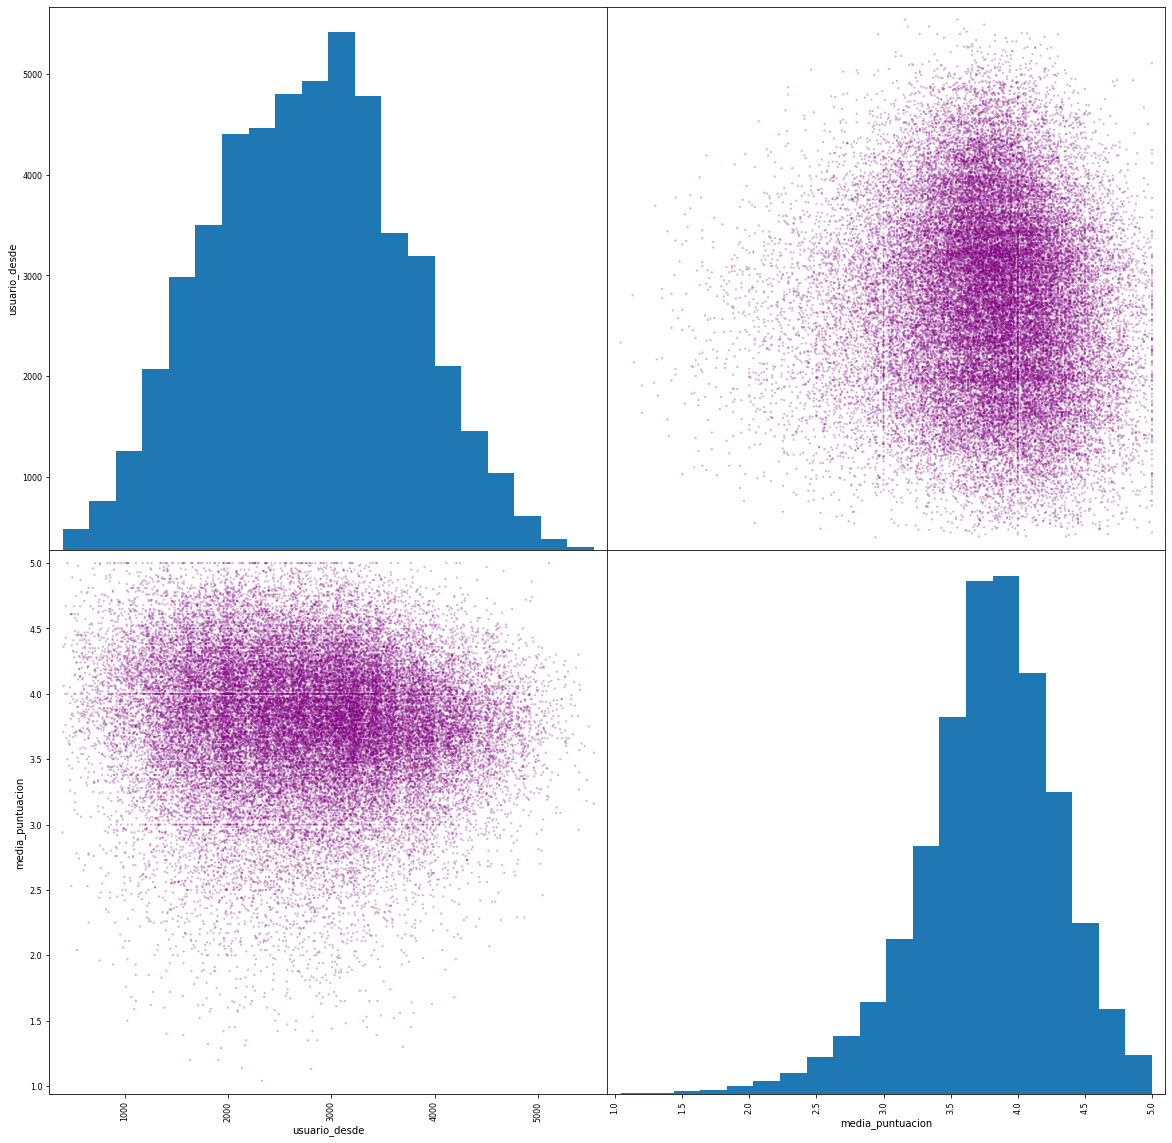

In [89]:
usersMas15Rev = users[users['num_opiniones'] > 15]
medPun_usrDesde_Sesgado = usersMas15Rev[['usuario_desde', 'media_puntuacion']]
pd.plotting.scatter_matrix(medPun_usrDesde_Sesgado, figsize=(20, 20), marker='o',hist_kwds={'bins': 20}, s=5, alpha=.3, color='purple')
plt.show()

**--> PREMISA 1 (respuesta):** Al sesgar los datos, conseguimos atenuar en gran medida el patrón mencionado anteriormente, lo que verifica nuestra premisa.

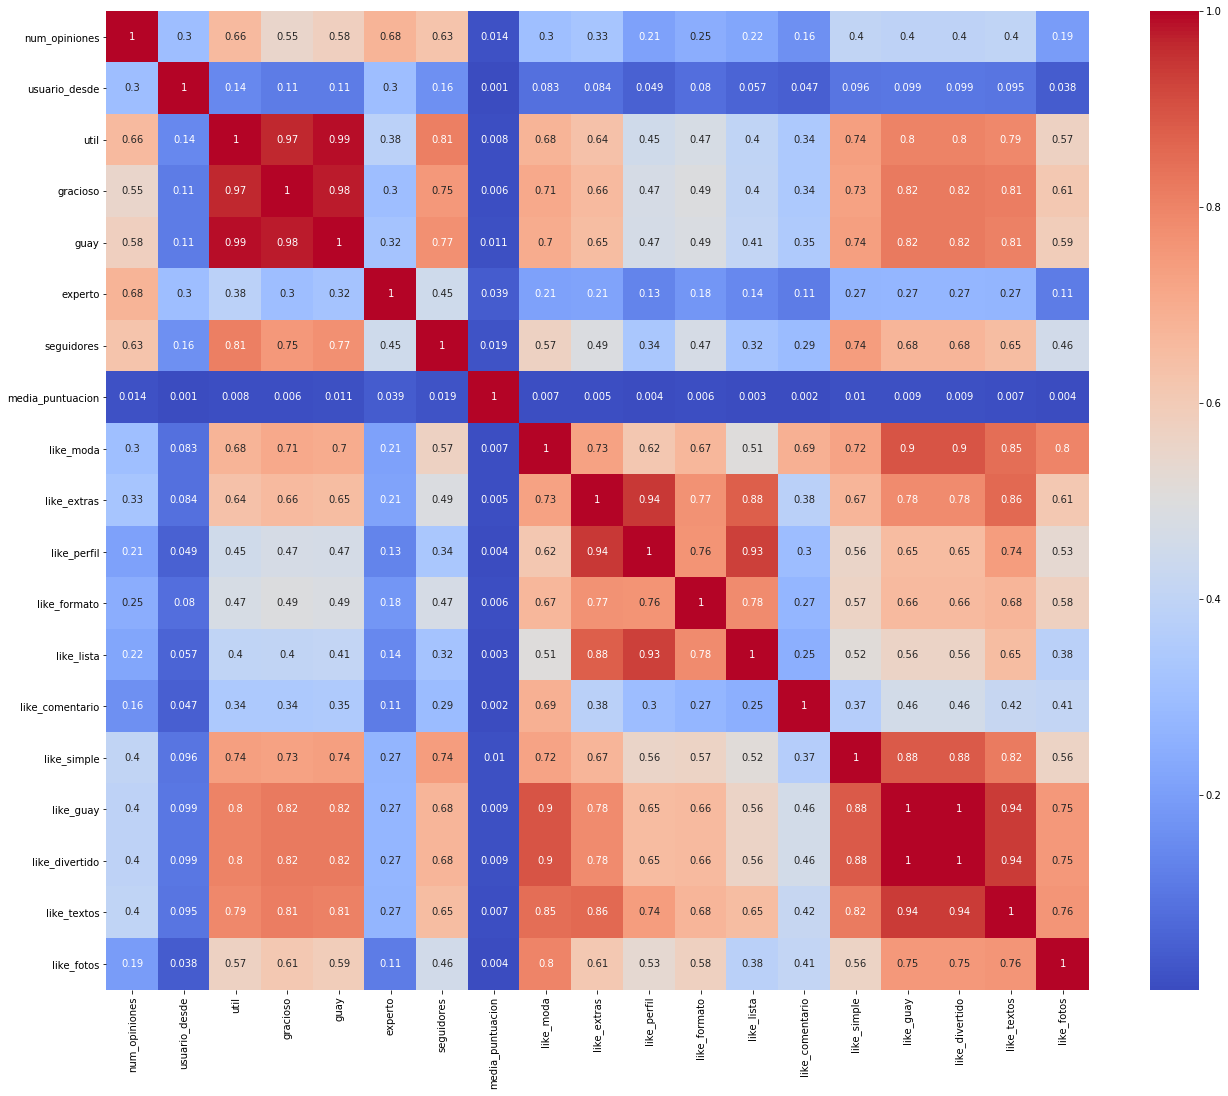

In [90]:
correlation_matrix = users.corr().round(3)
plt.subplots(figsize=(22,18))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

El **número de seguidores** depende en ligera medida del **número de revisiones** (0'63). Para conseguir un grupo de seguidores alto, lo más importante es la constancia, por lo que un alto número de revisiones puede llegar a transformarse en un alto número de seguidores. Si un usuario escribe revisiones útiles de muchos sitios (alto número de revisiones), la gente se fijará en su persona para ir o no a algún lugar. Y a su vez, esta cantidad de seguidores, marcarán las revisiones de este usuario como **útil**, **gracioso** y **guay** (mayor número de estos respecto a un usuario con bajos seguidores).  

También, el número de marcas **experto** se debe, en cierta medida, al **número de revisiones** (0'68 de correlación). De hecho, la variable que más se correla con **experto** es el **número de revisiones**, por lo que esta insignia puede deberse, en parte, al valor de esta última variable.  

Que un usuario tenga **antigüedad** **no** quiere decir que tenga **más opiniones**. Tampoco hace que una cuenta tenga un mayor **número de seguidores**, ni se correla con ninguna de las demás variables. 

**--> PREMISA 2:** hay cuentas que solo se crean para comentar una vez (o muy pocas veces).

Hay una alta linealidad entre **útil**, **guay** y **gracioso**, que además, como hemos mencionado antes, se correla con el **número de seguidores**.  
**--> PREMISA 3:** los usuarios con un número de seguidores muy pequeño influye en o está relacionado con la cantidad de 'útil', 'guay' y 'gracioso' que se obtiene.  

Estas tres variables también tienen una alta correlación con **like_guay**, **like_divertido** y **like_textos**. Esto puede deberse a que, un comentario con muchos 'útil', 'gracioso' y 'guay' tiene más posibilidad de ser considerado por los lectores como algo guay y divertido. Al ser así, tiene sentido que tabién les guste el texto, por eso la alta relación con *like_textos*.

La **media de puntuación** es una variable completamente independiente.  

Podemos apreciar un 'cluster' de correlaciones altas entre **like_extras**, **like_perfil**, **like_formato** y **like_listas**. Otro 'cluster' del mismo estilo es **like_moda**, **like_simple**, **like_guay**, **like_divertido**, **like_textos** y **like_fotos**. Esto puede indicar en la misma pantalla en la que un usuario puede seleccionar un tipo de like, también se encuentran los respectivos del 'cluster'. Esto explicaría la relación entre estas variables.

Total linealidad entre **like_guay** y **like_divertido**.

Como podemos observar, los campos referentes a los likes tienen gran correlación entre sí ya que un usuario activo no va a tener solo un tipo de like, si no que va a tener, como norma general, los likes distribuidos de forma más o menos proporcional.

*Un dato curioso que vemos es que no hay ninguna correlación inversa alta. Esto es debido a que no hay campos que puedan ser negativos y son todos acumulativos, por lo que las diferencias se reducen con todo el ruido añadido por los valores cercanos al 0.*

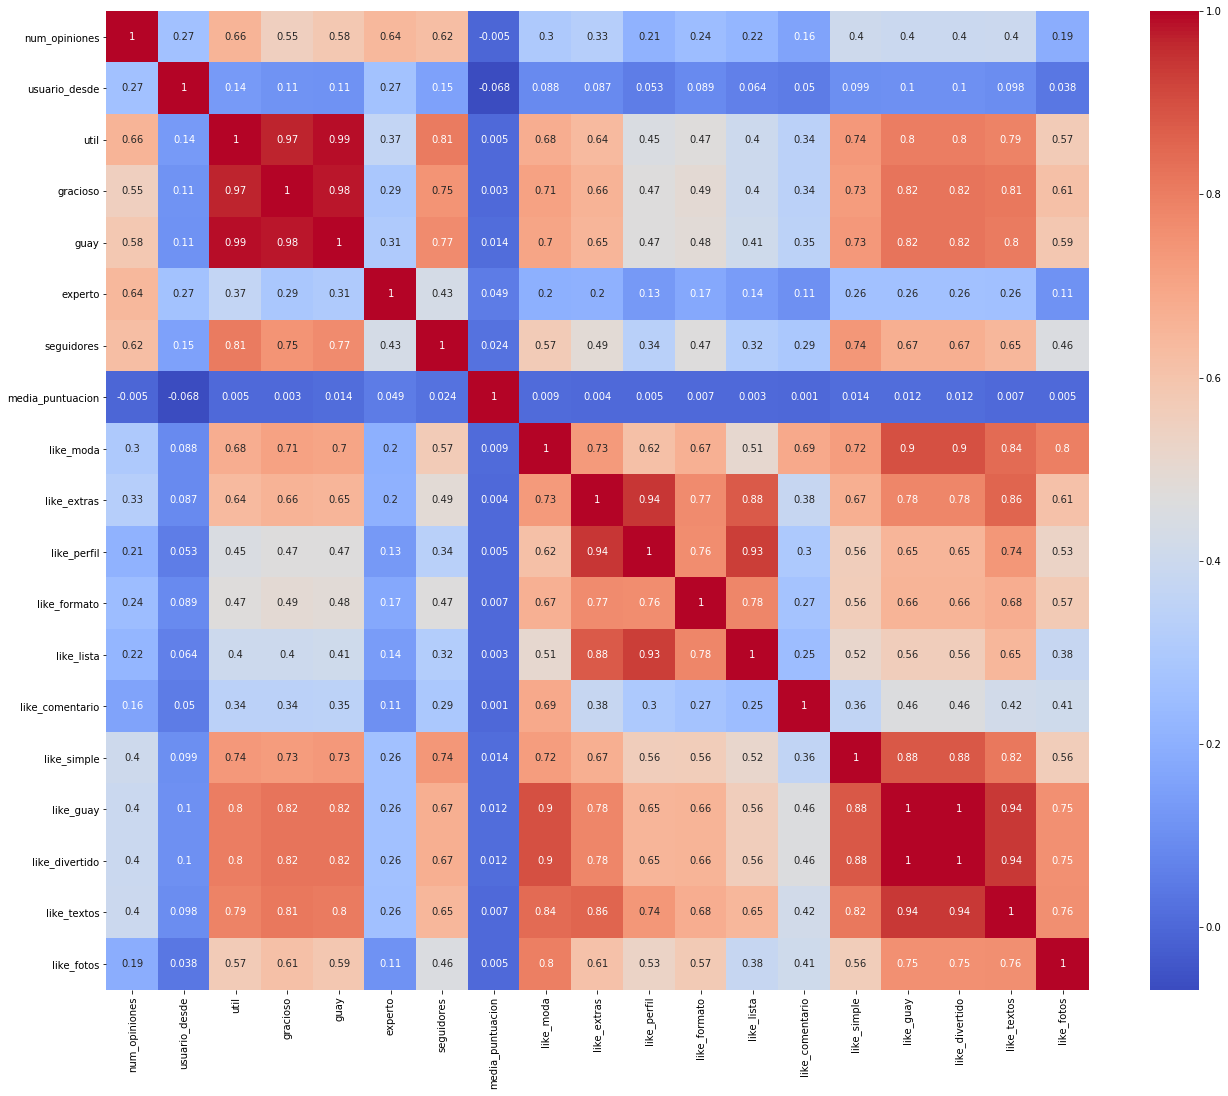

In [91]:
correlation_matrix = usersMas15Rev.corr().round(3)
plt.subplots(figsize=(22,18))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

Creando una *matriz de correlación* sesgando los datos (usando los usuarios con más de 15 revisiones) observamos que las correlaciones no cambian en demasía. 

### Gráficos e investigación de las premisas

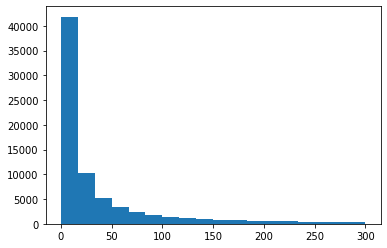

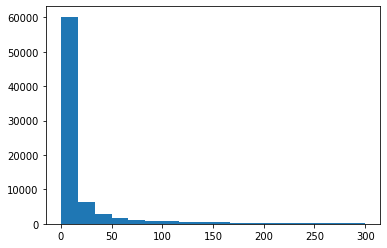

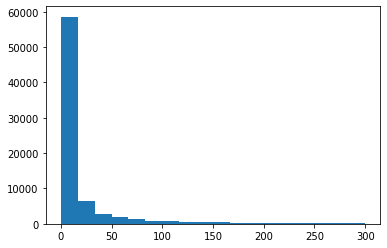

In [92]:
plt.hist(users["util"], bins = 18, range =(0, 300))
plt.show()
plt.hist(users["gracioso"], bins = 18, range =(0, 300))
plt.show()
plt.hist(users["guay"], bins = 18, range =(0, 300))
plt.show()

La gran mayoría de los usuarios tienen unos unos 20 o menos comentarios valorados como útiles, graciosos, guays.

Total de usuarios --> 80061
El 71.77527135559136 % de usuarios ( 57464 ) tiene 50 opiniones o menos
El 51.14350307890234 % de usuarios ( 40946 ) tiene 20 opiniones o menos
El 20.485629707348146 % de usuarios ( 16401 ) tiene 5 opiniones o menos
El 8.725846542011716 % de usuarios ( 6986 ) tiene 2 opiniones o menos


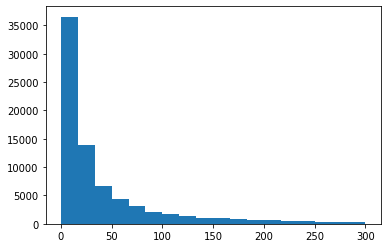

In [93]:
plt.hist(users["num_opiniones"], bins = 18, range =(0, 300))
print("Total de usuarios -->", len(users))
user50op = users[users['num_opiniones'] <= 50]
print("El", len(user50op)/len(users)*100, "% de usuarios (", len(user50op), ") tiene 50 opiniones o menos")
user20op = users[users['num_opiniones'] <= 20]
print("El", len(user20op)/len(users)*100, "% de usuarios (", len(user20op), ") tiene 20 opiniones o menos")
user5op = users[users['num_opiniones'] <= 5]
print("El", len(user5op)/len(users)*100, "% de usuarios (", len(user5op), ") tiene 5 opiniones o menos")
user2op = users[users['num_opiniones'] <= 2]
print("El", len(user2op)/len(users)*100, "% de usuarios (", len(user2op), ") tiene 2 opiniones o menos")

***--> PREMISA 2*** *(cita con anterioridad): hay cuentas que solo se crean para comentar una vez (o muy pocas veces).*

**--> PREMISA 2 (respuesta):** El histograma que podemos ver arriba muestra el número de opiniones realizados. Como observamos en el texto que hay encima, entorna al **20% de los usuarios** tiene **5 opiniones o menos**. Entorno a un **9%** han realizado **2 o menos comentarios** en la página. De por sí, el número de opiniones que los usuarios realizan es bajo. La mitad de ellos ha realizado solo 20 comentarios o menos. Volviendo a la *premisa 2*, podemos decir que hay cuentas que solo se han creado para realizar opiniones concretas, o que se han creado para poder leer y puntuar otras opiniones.

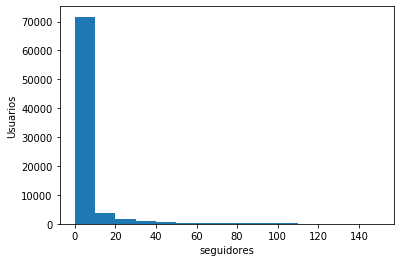

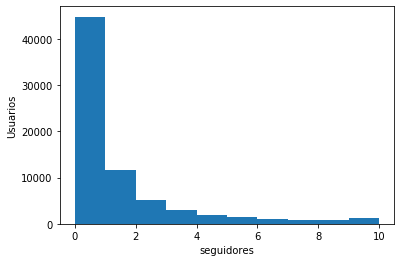


El 90.31613394786476 % de usuarios ( 72308 ) tiene 10 o menos seguidores

El 0.08868237968548981 % de usuarios ( 71 ) tiene 500 o más seguidores

El 56.03477348521753 % de usuarios ( 44862 ) tiene 0 seguidores


 count    80061.000000
mean         5.930391
std         35.897297
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       2964.000000
Name: seguidores, dtype: float64 

count    72308.000000
mean         1.082370
std          2.023775
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: seguidores, dtype: float64 



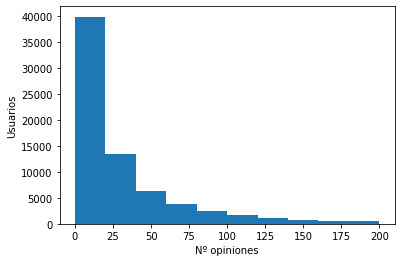


 count    72308.000000
mean        35.399983
std         53.299457
min          1.000000
25%          6.000000
50%         16.000000
75%         42.000000
max       1125.000000
Name: num_opiniones, dtype: float64 



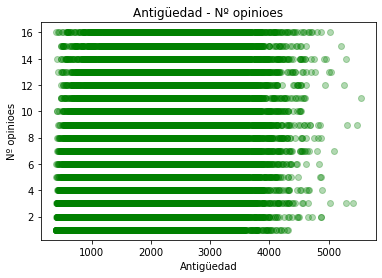

In [94]:
plt.hist(users["seguidores"], bins = 15, range =(0, 150))
plt.xlabel("seguidores")
plt.ylabel("Usuarios")
plt.show()

user10fo = users[users['seguidores'] <= 10]
plt.hist(user10fo["seguidores"], bins = 10)
plt.xlabel("seguidores")
plt.ylabel("Usuarios")
plt.show()

print("\nEl", len(user10fo)/len(users)*100, "% de usuarios (", len(user10fo), ") tiene 10 o menos seguidores\n")
userMore500fo = users[users['seguidores'] >= 500]
print("El", len(userMore500fo)/len(users)*100, "% de usuarios (", len(userMore500fo), ") tiene 500 o más seguidores\n")

print("El", len(user10fo[user10fo['seguidores'] == 0])/len(users)*100, "% de usuarios (", len(user10fo[user10fo['seguidores'] == 0]), ") tiene 0 seguidores\n")
print("\n", users['seguidores'].describe(), "\n")
print(user10fo['seguidores'].describe(),"\n")

plt.hist(user10fo["num_opiniones"], bins = 10, range =(0, 200))
plt.xlabel("Nº opiniones")
plt.ylabel("Usuarios")
plt.show()
print("\n",user10fo["num_opiniones"].describe(), "\n")

usersLessFo = user10fo[user10fo['num_opiniones'] <= 16]

x = usersLessFo["usuario_desde"]
y = usersLessFo["num_opiniones"]
plt.scatter(x, y, color='green', alpha=0.3)
plt.title("Antigüedad - Nº opinioes")
plt.xlabel("Antigüedad")
plt.ylabel("Nº opinioes")
plt.show()
print("\n")

Podemos observar en el primer histograma de arriba y con el texto que tiene encima, que entorno al **90% de usuarios** tiene **10 seguidores o menos**.
También vemos que solo hay entorno al **0.1%** de usuarios con **500 o más seguidores**.

En el segundo histograma, podemos ver que de entre los usuarios con 10 o menos seguidores, gran parte de ellos solo tienen 1 o 0 seguidores.
De hecho, entorno al **56%** de los usuarios no tienen seguidores.

La **media de seguidores** por usuario es de **5.93**, aunque baja a 1.08 si solo tenemos en cuenta a la gente con 10 o menos seguidores.

La media de comentarios por usuario es de entorno a 35 comentarios. 

Por último, observamos que existen cuentas que solo se crean para leer comentarios. Podemos encontrar casos con más de 4000 días de antiguedad (casi 11 años) con un número de comentarios casi nulo.

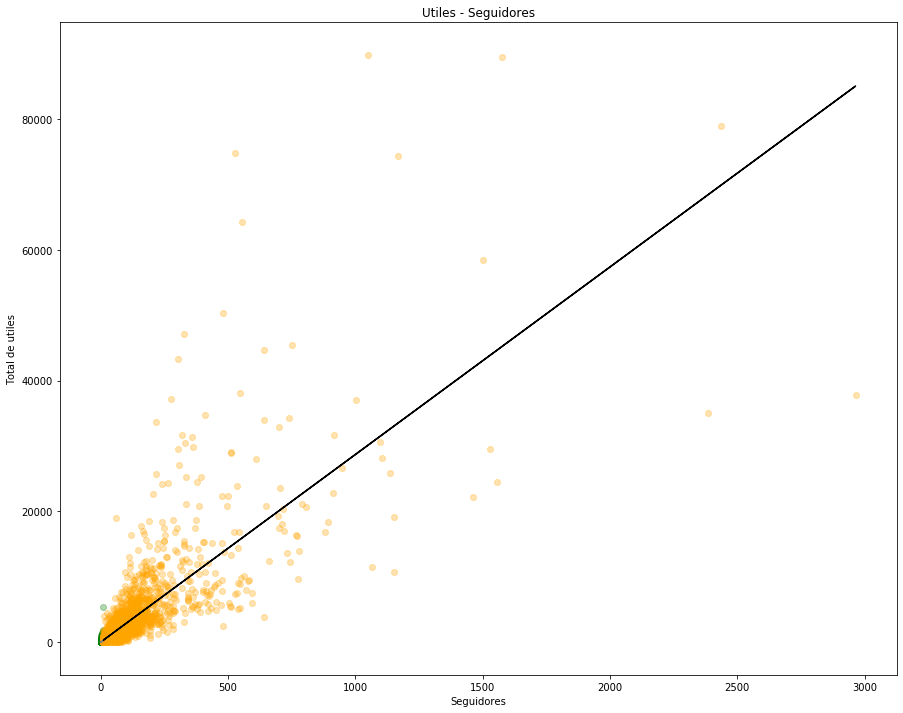

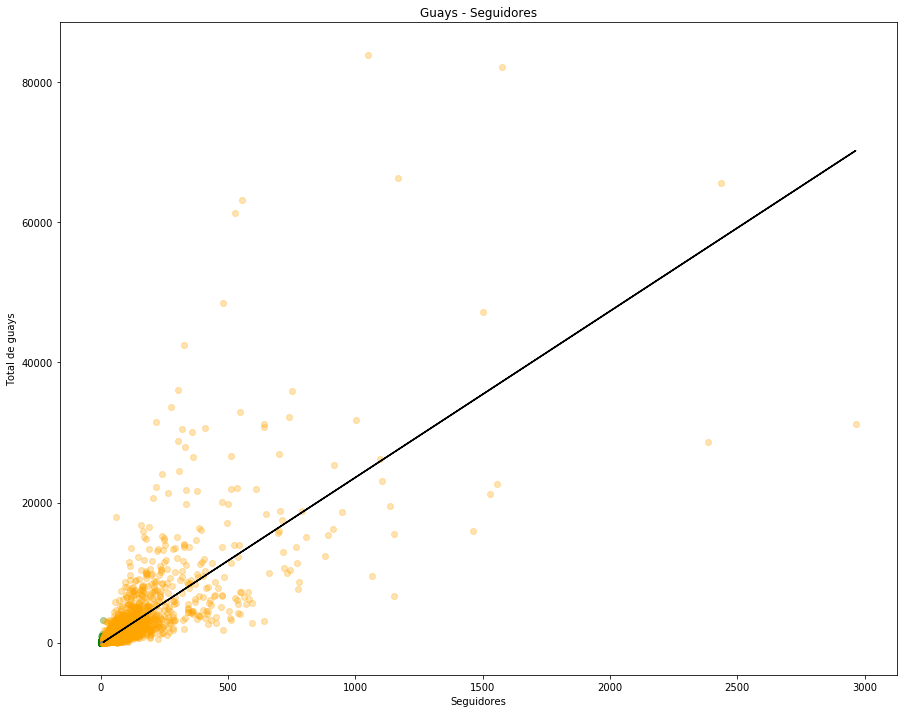

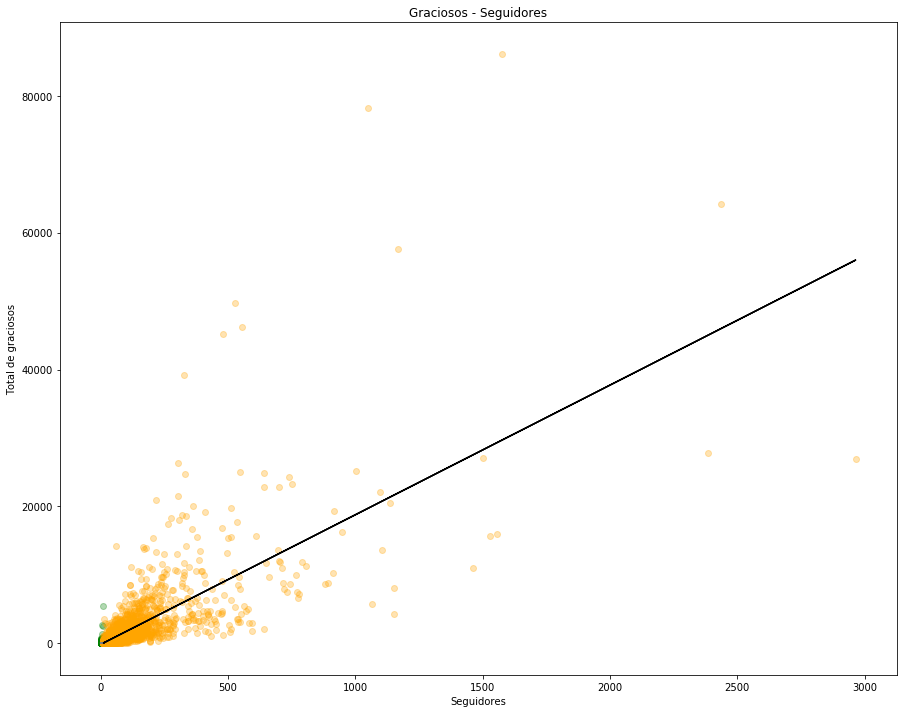

In [95]:
y = user10fo['util']
x = user10fo['seguidores']

userMore10fo = users[users['seguidores'] > 10]
v = userMore10fo['util']
u = userMore10fo['seguidores']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(u,v)

plt.figure(figsize=(15,12))
plt.plot(x, slope * x + intercept, color = 'grey')
plt.plot(u, slope2 * u + intercept2, color = 'black')
plt.scatter(x, y, color='green', alpha=0.3)
plt.scatter(u, v, color='orange', alpha=0.3)
plt.title("Utiles - Seguidores")
plt.xlabel("Seguidores")
plt.ylabel("Total de utiles")
plt.show()


y = user10fo['guay']
x = user10fo['seguidores']

v = userMore10fo['guay']
u = userMore10fo['seguidores']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(u,v)

plt.figure(figsize=(15,12))
plt.plot(x, slope * x + intercept, color = 'grey')
plt.plot(u, slope2 * u + intercept2, color = 'black')
plt.scatter(x, y, color='green', alpha=0.3)
plt.scatter(u, v, color='orange', alpha=0.3)
plt.title("Guays - Seguidores")
plt.xlabel("Seguidores")
plt.ylabel("Total de guays")
plt.show()


y = user10fo['gracioso']
x = user10fo['seguidores']

v = userMore10fo['gracioso']
u = userMore10fo['seguidores']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(u,v)

plt.figure(figsize=(15,12))
plt.plot(x, slope * x + intercept, color = 'grey')
plt.plot(u, slope2 * u + intercept2, color = 'black')
plt.scatter(x, y, color='green', alpha=0.3)
plt.scatter(u, v, color='orange', alpha=0.3)
plt.title("Graciosos - Seguidores")
plt.xlabel("Seguidores")
plt.ylabel("Total de graciosos")
plt.show()

***--> PREMISA 3*** *(citada anteriormente): los usuarios con un número de seguidores muy pequeño influye en o está relacionado con la cantidad de 'útil', 'guay' y 'gracioso' que se obtiene.*

**--> PREMISA 3 (respuesta):** Como podemos observar en los plots anteriores, hay una clara relación entre el número de seguidores y la cantidad de 'útil', 'guay' y 'gracioso' que se obtienen. También podemos observar que hay una mayor influencia del número de seguidores sobre la cantidad de 'útiles' conseguidos que sobre los 'graciosos'.

In [96]:
likes = users[["like_moda", "like_extras", "like_perfil", "like_formato", "like_lista", 
               "like_comentario", "like_simple", "like_guay", "like_divertido", "like_textos", "like_fotos"]].sum(axis = 1)
print(likes)

0         4
1        74
2        11
3         0
4        93
         ..
80056     0
80057     0
80058     0
80059     0
80060     0
Length: 80061, dtype: int64


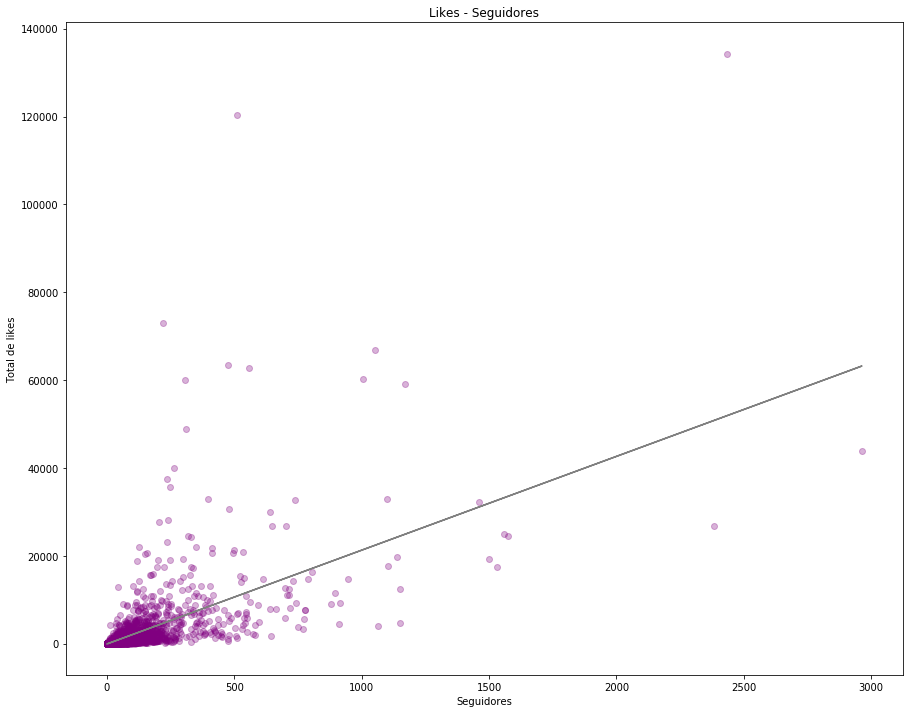

In [97]:
y = likes
x = users['seguidores']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.figure(figsize=(15,12))
plt.plot(x, slope * x + intercept, color = 'grey')
plt.scatter(x, y, color='purple', alpha=0.3)
plt.title("Likes - Seguidores")
plt.xlabel("Seguidores")
plt.ylabel("Total de likes")
plt.show()

Un mayor número de seguidores puede implicar un aumento en el número de likes, cosa que tiene sentido pues más gente ve tus comentarios puede puntuarlos, pero puede no ser la principal razón. 

Se observa un aumento de likes, puede ser por la razón mencionada en el párrafo anterior, pero es tímido. De hecho, las personas que más likes tienen no son las que más seguidores tienen.

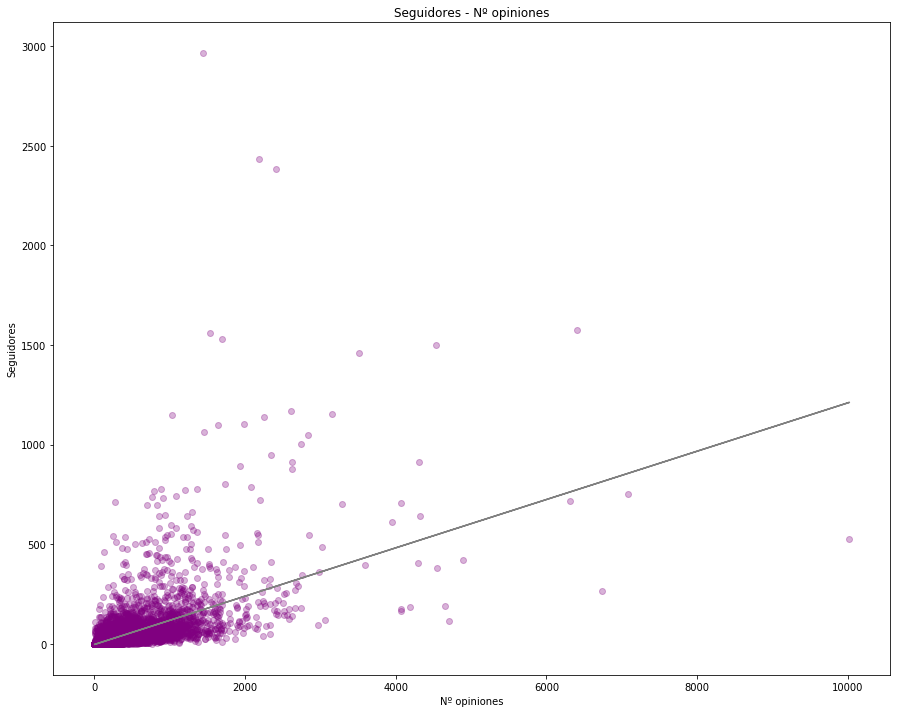

In [98]:
y = users['seguidores']
x = users['num_opiniones']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.figure(figsize=(15,12))
plt.plot(x, slope * x + intercept, color = 'grey')
plt.scatter(x, y, color='purple', alpha=0.3)
plt.title("Seguidores - Nº opiniones")
plt.xlabel("Nº opiniones")
plt.ylabel("Seguidores")
plt.show()

La línea de tendencia muestra que un mayor nº de opiniones supondría un mayor nº de seguidores. Tiene sentido, pues vas a ser visto por un mayor número de personas. 
Pero lo que vemos principalmente es un cluster entre 0 y algo menos de 2000 opiniones. 

En resumen, se puede observar que tener un gran número de opiniones no implica tener un gran número de seguidores, hay gente con muchos seguidores y un número medio de opiniones; pero es verdad que puede ayudar a conseguir que aumenten.